### National Occupation Analysis with an emphisis on IT Computer job types.  Bureau of Labor Statistics (BLS) Data - Lastest data used, May 2018

In [1]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

In [2]:
#Input Data from BLS (Bureau of Labor Statistics on Occupation Types, Employee Counts, USA and States)
#Read from csv file

in_states = os.path.join("..","Resources","BLS_state_M2018_dl.csv")
states_df = pd.read_csv(in_states)

in_nation = os.path.join("..","Resources","BLS national_M2018_dl.csv")
nation_df = pd.read_csv(in_nation)


In [3]:
#Clean Data for field Total Employee count field for use

#convert null data represented by "**' to zeros
nation_df.loc[states_df["TOT_EMP"] == '**', "TOT_EMP"] = "0"
states_df.loc[states_df["TOT_EMP"] == '**', "TOT_EMP"] = "0"

#convert Total column to integer
nation_df['TOT_EMP'] = nation_df['TOT_EMP'].str.replace(',', '').astype(int)
states_df['TOT_EMP'] = states_df['TOT_EMP'].str.replace(',', '').astype(int)

#clean data
nation_df["OCC_TITLE"] = nation_df["OCC_TITLE"].str.replace("Occupations", "", case = False) 
states_df["OCC_TITLE"] = states_df["OCC_TITLE"].str.replace("Occupations", "", case = False) 


In [4]:
#National - Major Occupations Only
nation_major_df = nation_df.loc[nation_df["OCC_GROUP"] == "major", :].reset_index(drop="true")
nation_major_count = len(nation_major_df)

#Sort Nation by Employee Count, highest to lowest
nation_major_sort = nation_major_df[["OCC_CODE", "OCC_TITLE", "OCC_GROUP", "TOT_EMP"]].sort_values("TOT_EMP", ascending=False)

nation_major_sort.head()

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP
16,43-0000,Office and Administrative Support,major,21828990
15,41-0000,Sales and Related,major,14542290
12,35-0000,Food Preparation and Serving Related,major,13374620
21,53-0000,Transportation and Material Moving,major,10244260
20,51-0000,Production,major,9115530


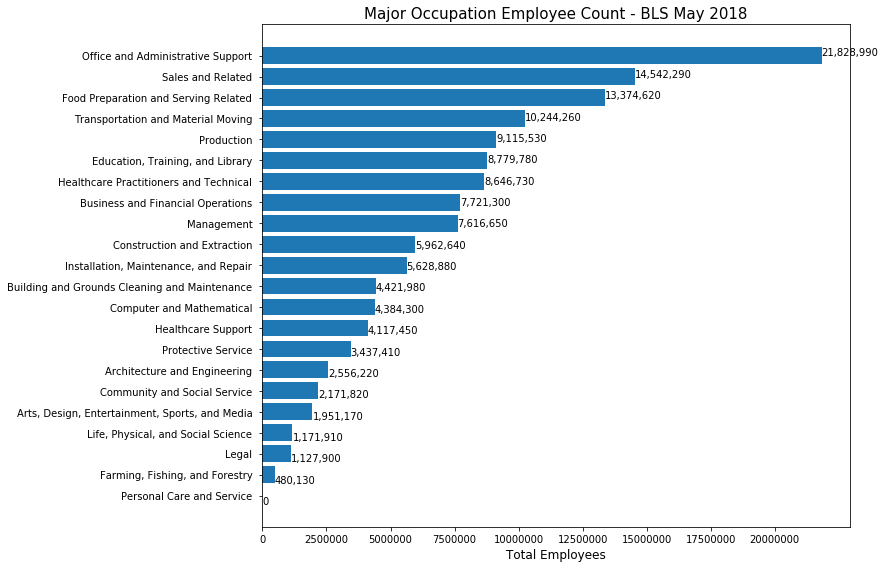

In [5]:
#Plot Output - Horizontal Bar Graph
#plt.rcdefaults()
fig, ax = plt.subplots(figsize=(12,8))

x_axis = nation_major_sort["TOT_EMP"].tolist()
y_axis = nation_major_sort["OCC_TITLE"].tolist()

# ind = np.arange(len(y_axis)) 
height_y = .8
rects1 = ax.bar(nation_major_count-1, y_axis, color='black')

ax.barh(y_axis, x_axis, height= height_y, align='center')
ax.set_yticks(y_axis)
ax.set_yticklabels(y_axis)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xticks(np.arange(min(x_axis), max(x_axis)+5, 2500000))
ax.set_xticklabels(np.arange(min(x_axis), max(x_axis)+5, 2500000))

ax.set_xlabel("Total Employees", fontsize=12)
ax.set_title("Major Occupation Employee Count - BLS May 2018", fontsize=15)
plt.tight_layout()

#label bars
def autolabel(rects):
    for ii,rect in enumerate(rects):
        height = rect.get_height()
        wide = rect.get_width()
        label = "{:,}".format(x_axis[ii])
        ax.text(x_axis[ii] + 11, 1.02*height, label) 
      
autolabel(rects1)

# Save the Figure
plt.savefig("../output_charts/National_Occupation_List.png", bbox_inches = "tight")


In [6]:
#National -  One Occupation at the Major Group Level and store minor levels

## Show National at the Detailed Levels - 
nation_major_one_df = nation_df.loc[(nation_df["OCC_CODE"].str.contains("15-")) 
                                    & (nation_df["OCC_GROUP"] == "major"), :].reset_index(drop="true") 

nation_detail_one_df = nation_df.loc[(nation_df["OCC_CODE"].str.contains("15-")) 
                                    & (nation_df["OCC_GROUP"] == "detailed"), :].reset_index(drop="true") 

nation_detail_count = len(nation_detail_one_df)

#Sort Nation by Occupation Code,
nation_detail_sort = nation_detail_one_df[["OCC_CODE", "OCC_TITLE", "OCC_GROUP", "TOT_EMP"]].sort_values("TOT_EMP", ascending=False)

nation_detail_sort.head()


,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP
4,15-1132,"Software Developers, Applications",detailed,903160
10,15-1151,Computer User Support Specialists,detailed,630700
1,15-1121,Computer Systems Analysts,detailed,587970
5,15-1133,"Software Developers, Systems Software",detailed,405330
12,15-1199,"Computer , All Other",detailed,381380


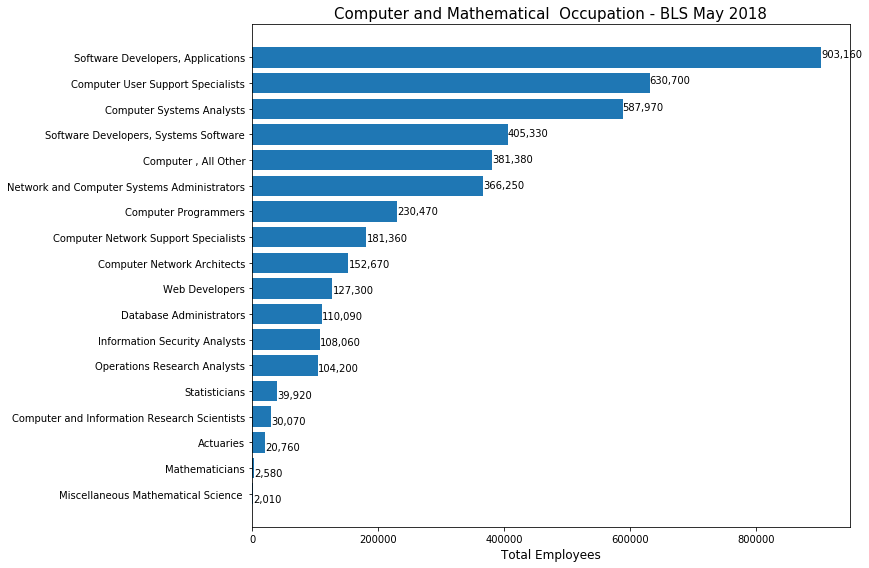

In [7]:
#Plot National IT Occupations

#Plot Output - Horizontal Bar Graph

fig, ax = plt.subplots(figsize=(12,8))

x_axis = nation_detail_sort["TOT_EMP"].tolist()
y_axis = nation_detail_sort["OCC_TITLE"].tolist()

height_y = .8
rects1 = ax.bar(nation_detail_count-1, y_axis, color='black')

ax.barh(y_axis, x_axis, height= height_y, align='center')
ax.set_yticks(y_axis)
ax.set_yticklabels(y_axis)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xticks(np.arange(0, max(x_axis)+5, 200000))
ax.set_xticklabels(np.arange(0, max(x_axis)+5, 200000))

title_occ = nation_major_one_df.loc[0, "OCC_TITLE"]

ax.set_xlabel("Total Employees", fontsize=12)
ax.set_title(f"{title_occ} Occupation - BLS May 2018", fontsize=15)
plt.tight_layout()

#label bars
def autolabel(rects):
    for ii,rect in enumerate(rects):
        height = rect.get_height()
        label = "{:,}".format(x_axis[ii])
        ax.text(x_axis[ii] + 11, 1.02*height, label) 
      
autolabel(rects1)

# Save the Figure
plt.savefig("../output_charts/National_IT_List.png", bbox_inches = "tight")
